# Introduction

The KPIs that will be discussed:

1. Sales Revenue

> Commonly, it's represented by gross-value.

2. Cost Per Acquisition (CPA)

> The metric tells how much it costs to acquire a customer through the marketing efforts.

If CPA high ==> It cost more to acquire a new customer.
If CPA low ==> It cost less to acquire a new customer.

NOTE: CPA high doesn't mean bad things. We can still have a very profitable marketing campaign with high CPA.


3. Site traffic

- Click-through Rate

> Click-through rate (CTR) is the percentage of people who viewed your advertisement and then went on to click the advertisement.

>```CTR = (Number of Clicks) / (Number of Views)```

NOTE:
  
  a. It measures how effective your online marketing is in bringing traffic to your website.
  
  b. Number of clicks is a subset of the total website traffic, focusing on the interactions with a specific element.



- Lead Ratio

> Measure how much of the website traffic can be converted into leads.

>```Lead Ratio = (Number of Leads Generated / Total Website Traffic) * 100%```

NOTE: Typically, only a subset of website traffic is a good fit to become your customers.

- Marketing qualified leads (MQL)

> The leads that are ready to be marketed to and meet business-specific criteria to become customers who are likely to make purchases, based on their characteristics.

4. Conversion Rate

> The conversion rate is the percentage of leads that are converted into active customers.

>```Customer Rate = (Number of paying customer) / (Number of leads)```

NOTE: The leads in this case is the qualified leads.

> If your goal is to see what percentage of leads signed up on your website:

>```Customer Rate = (Number of Sign-up) / (Number of leads)```


# Hypothesis Case

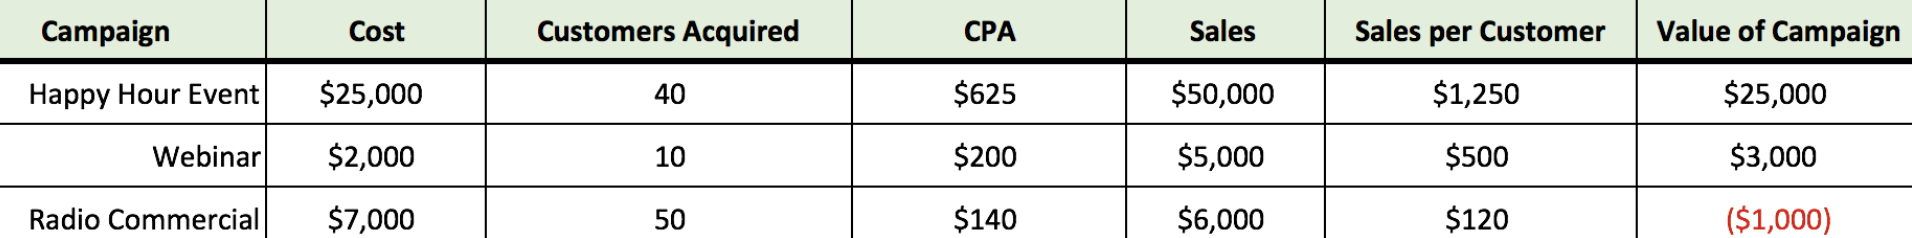

Conclusion:
- Happy Hour Event => The most expensive marketing event (both total cost and CPA), but it generated the most sales and sales per customer. ==> It was the most valuable campaign.

- Radio Commercial => The lowest CPA marketing campaign, but the total sales from these customers did not exceed the total cost of this campaign. ==> It was the worst valuable campaign.

NOTE:
- In reality, similar case can happen in real life. The quality of customers acquired through highly-targeted marketing campaigns is many times better compared to non-targeted marketing campaigns.

# Conversion Rate

NOTE:
For the exercise in this section, we are going to use the UCI's Bank Marketing Data Set, which can be found at this link https://archive.ics.uci.edu/ml/datasets/bank+marketing


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/bank-additional/bank-additional-full.csv', sep=';')

print(df.info())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df['conversion'] = df['y'].apply(lambda x: 1 if x=='yes' else 0)

In [8]:
# Aggregate conversion rate

print(f'Total conversion: {df.conversion.sum()} out of {df.shape[0]}')
print(f'Total conversion rate: {round(df.conversion.sum() / df.shape[0], 4) * 100} %')

Total conversion: 4640 out of 41188
Total conversion rate: 11.27 %


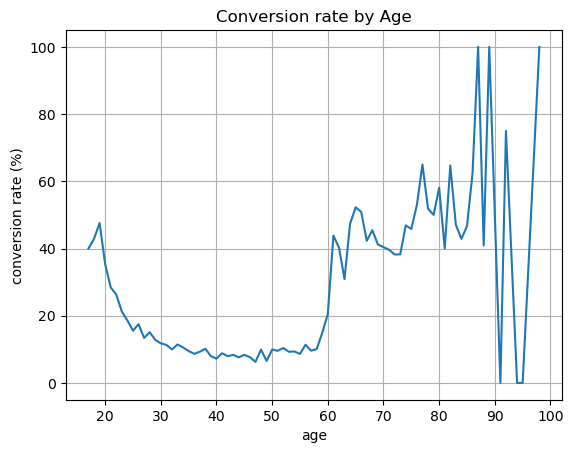

In [10]:
# Conversion rates by age

total_conversion_by_age = df.groupby(['age'])['conversion'].sum()
count_by_age = df.groupby(['age'])['conversion'].count()
conversions_by_age = (total_conversion_by_age / count_by_age) * 100

# Plot
ax = conversions_by_age.plot(grid=True, title='Conversion rate by Age')
ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')
plt.show()

NOTE:
- There are lots of noise in old age groups ( 70 or older). It indicate that the data from 70 or older are vary a lot and according to the data most client in this age group is relatively small compared to other age groups.

- To reduce unwanted noise, we can group multiple ages together.

age_group
70+           469
[18, 30)     5669
[30, 40)    16938
[40, 50)    10526
[50, 60)     6862
[60, 70)      724
Name: conversion, dtype: int64


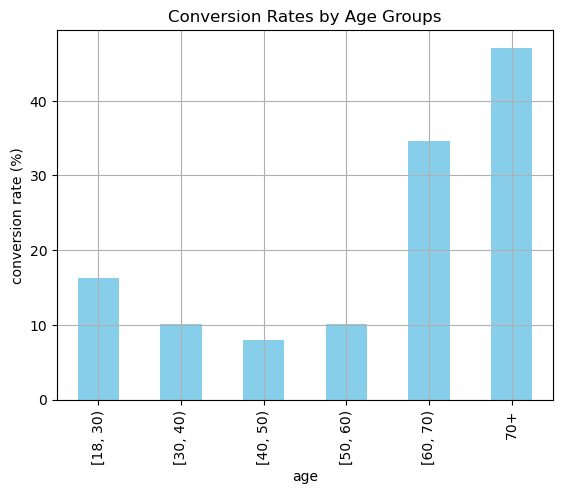

In [27]:
# Reduce unwanted reduce

df['age_group'] = df['age'].apply(
    lambda x: '[18, 30)' if x < 30 
        else '[30, 40)' if x < 40 
        else '[40, 50)' if x < 50
        else '[50, 60)' if x < 60
        else '[60, 70)' if x < 70 
        else '70+'
)

total_conversion_by_age = df.groupby(['age_group'])['conversion'].sum()
count_by_age = df.groupby(['age_group'])['conversion'].count()
conversions_by_age = (total_conversion_by_age / count_by_age) * 100

print(count_by_age)

# Plot
ax = conversions_by_age.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']]\
    .plot(kind='bar', color='skyblue', grid=True, title='Conversion Rates by Age Groups')
ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')
plt.show()

In [33]:
# Conversions  vs Non-conversions

conversions_by_marital_status = pd.pivot_table(df, values='y', 
                                               index='marital', 
                                               columns='conversion', 
                                               aggfunc=len)
conversions_by_marital_status.columns = ['non_conversions', 'conversions']
conversions_by_marital_status

,non_conversions,conversions
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


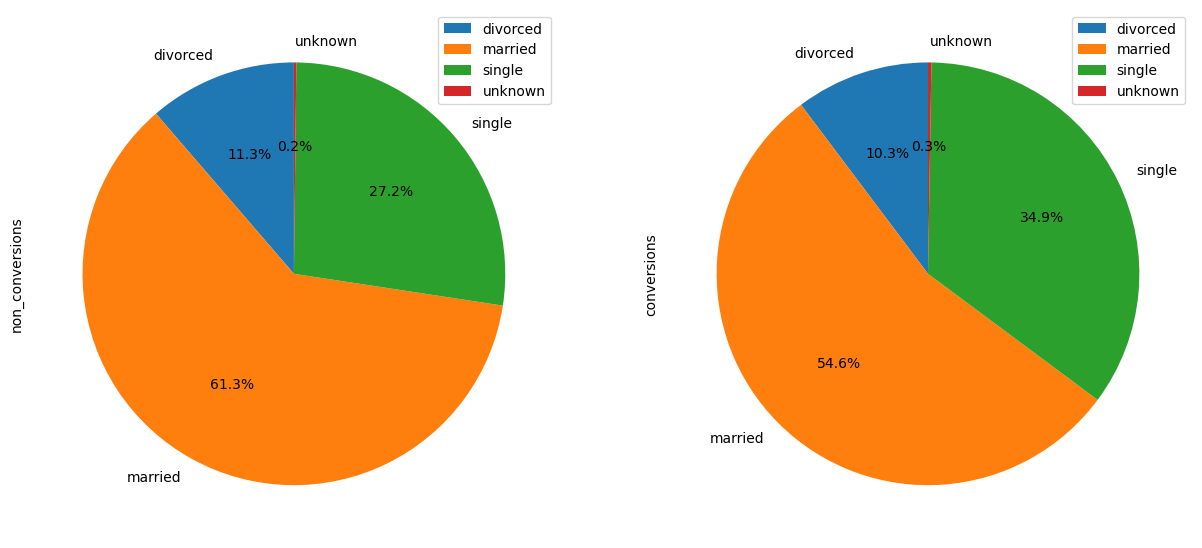

In [34]:
conversions_by_marital_status.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

we can easily see that the married group takes up the largest proportions in both conversions and non-conversions groups, while the single group comes as the second. 

In [40]:
age_marital = df.groupby(['age_group', 'marital'])['conversion']\
                    .sum()\
                    .unstack('marital')\
                    .fillna(0)
age_marital

marital,divorced,married,single,unknown
age_group,,,,
70+,64.0,151.0,6.0,0.0
"[18, 30)",12.0,158.0,751.0,1.0
"[30, 40)",128.0,897.0,684.0,6.0
"[40, 50)",126.0,575.0,130.0,3.0
"[50, 60)",119.0,533.0,44.0,1.0
"[60, 70)",27.0,218.0,5.0,1.0


In [43]:
age_marital = age_marital.divide(
    df.groupby(['age_group'])['conversion'].count(), 
    axis=0)

age_marital

marital,divorced,married,single,unknown
age_group,,,,
70+,0.136461,0.321962,0.012793,0.000000
"[18, 30)",0.002117,0.027871,0.132475,0.000176
"[30, 40)",0.007557,0.052958,0.040383,0.000354
"[40, 50)",0.011970,0.054627,0.012350,0.000285
"[50, 60)",0.017342,0.077674,0.006412,0.000146
"[60, 70)",0.037293,0.301105,0.006906,0.001381


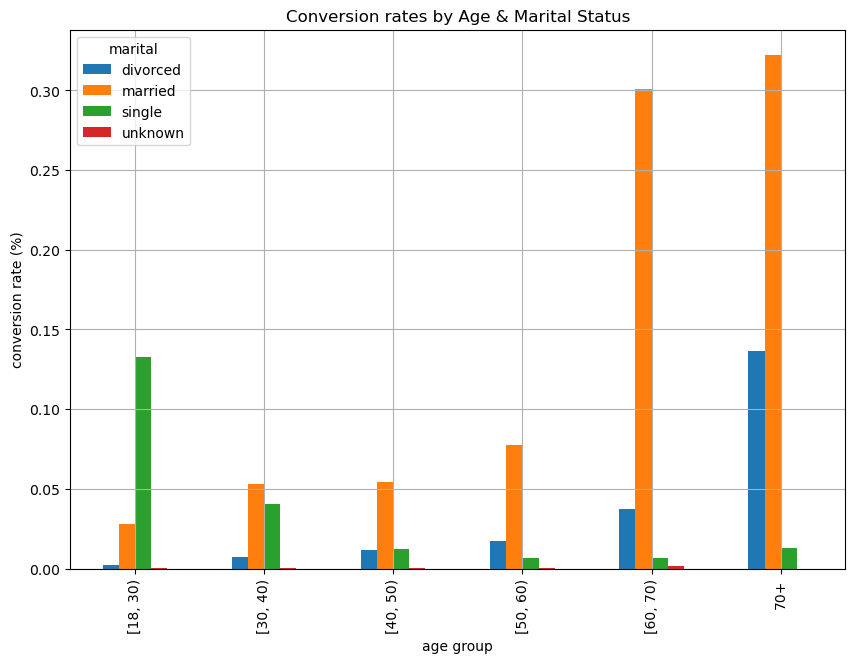

In [44]:
ax = age_marital.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar', 
    grid=True,
    figsize=(10,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()

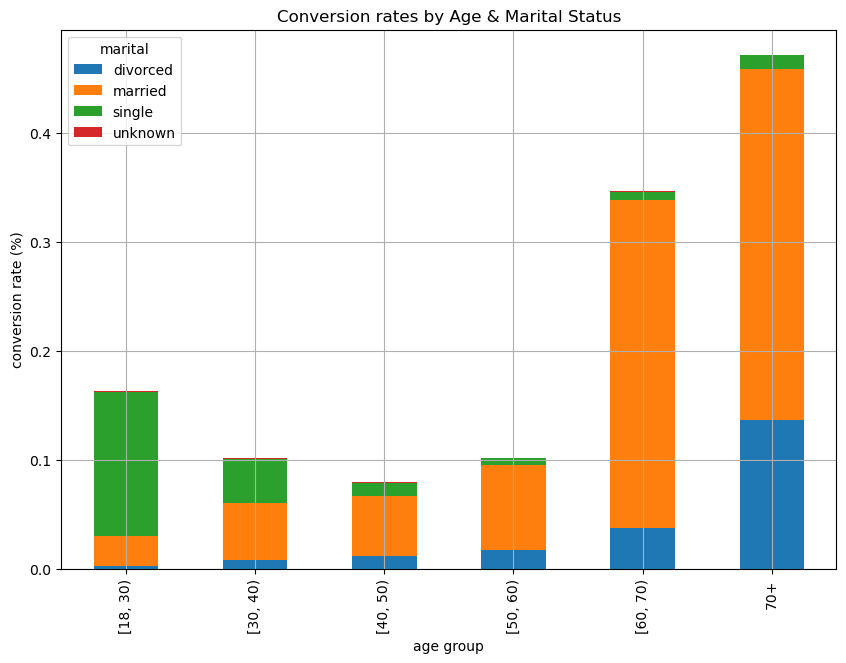

In [45]:
ax = age_marital.loc[
    ['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
    kind='bar', 
    stacked=True,
    grid=True,
    figsize=(10,7)
)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('age group')
ax.set_ylabel('conversion rate (%)')

plt.show()

As you can see from this data, we can now see the distribution of conversion rates based on two criteria, age group and martial status. For example, the conversion rate of clients who are single and between 18 and 30 years old is 13.25%, while the conversion rate of clients who are married and between 60 and 70 years old is 30.11%.